#**Telecom Churn Case Study**
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In [388]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [389]:
#setting display full column width
pd.set_option('display.max_colwidth', -1)
#setting maximum rows display
pd.set_option('display.max_rows',500)

In [390]:
#terminologies used in the given data
data_dictionary = pd.read_csv("data_dictionary.csv")
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


## **1. Data Understanding**

In [391]:
#reading the data
dataframe = pd.read_csv("train.csv")
dataframe.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [392]:
#basic information on the given dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [393]:
#basic description of given dataset
dataframe.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [394]:
#redundancy check
any(dataframe.duplicated())

False

In [395]:
#missing values check
round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2).sort_values(ascending = False) 

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

## **2. Data Cleaning**

In [396]:
#dropping columns that have maximum number of missing values and they will mess with analysis
dataframe.drop(['count_rech_2g_6','date_of_last_rech_data_6','count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6',
'total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','arpu_3g_7','count_rech_2g_7','fb_user_7',
'count_rech_3g_7','arpu_2g_7','av_rech_amt_data_7','max_rech_data_7','night_pck_user_7','total_rech_data_7','date_of_last_rech_data_7',
'fb_user_8','av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8',
'date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8'],axis=1,inplace=True)
dataframe.shape

(69999, 142)

In [397]:
#recheck for missing values
round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2).sort_values(ascending = False)

roam_og_mou_8           5.29
og_others_8             5.29
spl_og_mou_8            5.29
loc_ic_t2t_mou_8        5.29
loc_og_t2m_mou_8        5.29
loc_og_t2c_mou_8        5.29
loc_ic_t2m_mou_8        5.29
loc_og_t2t_mou_8        5.29
loc_ic_t2f_mou_8        5.29
std_og_t2f_mou_8        5.29
loc_ic_mou_8            5.29
isd_og_mou_8            5.29
roam_ic_mou_8           5.29
std_ic_t2t_mou_8        5.29
loc_og_mou_8            5.29
offnet_mou_8            5.29
std_ic_t2m_mou_8        5.29
onnet_mou_8             5.29
std_ic_t2f_mou_8        5.29
std_og_mou_8            5.29
std_ic_t2o_mou_8        5.29
std_og_t2t_mou_8        5.29
std_ic_mou_8            5.29
spl_ic_mou_8            5.29
std_og_t2c_mou_8        5.29
isd_ic_mou_8            5.29
std_og_t2m_mou_8        5.29
ic_others_8             5.29
loc_og_t2f_mou_8        5.29
isd_og_mou_6            3.95
spl_og_mou_6            3.95
std_og_mou_6            3.95
loc_ic_t2f_mou_6        3.95
loc_ic_t2t_mou_6        3.95
loc_ic_t2m_mou

In [398]:
#dropping few more columns which have no contribution to the analysis
dataframe.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7',
'last_date_of_month_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)
#shape of dataframe after dropping the columns
dataframe.shape

(69999, 129)

In [399]:
#recharge data is most important to understand the customer so lets use last recharge date
dataframe['date_of_last_rech_6'] = pd.to_datetime(dataframe.date_of_last_rech_6).dt.day
dataframe['date_of_last_rech_7'] = pd.to_datetime(dataframe.date_of_last_rech_7).dt.day
dataframe['date_of_last_rech_8'] = pd.to_datetime(dataframe.date_of_last_rech_8).dt.day
#imputing median for missing values
missing_cols = dataframe.columns[dataframe.isnull().sum()/len(dataframe.index) > 0.00]
for col in missing_cols:
    dataframe[col].fillna((dataframe[col].median()), inplace=True)
#check for missing values
any(round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2).sort_values(ascending = False))


False

In [400]:
#shape check as we have handled the missing values 
dataframe.shape

(69999, 129)

In [401]:
#considering the business let us derive most valuable customers
#Most Valuable Customers are those who contribute the maximum revenue generated by telecom company
#(ex: 80% of revenue for the year is from 2000 customers and 20% revenue is from 10,000 customers)
dataframe['avg_rech'] = (dataframe['total_rech_amt_6'] + dataframe['total_rech_amt_7'])/2
dataframe = dataframe[dataframe['avg_rech'] > dataframe['avg_rech'].quantile(0.70)]
dataframe.shape


(20951, 130)

In [402]:
#calculate total usage for 8th month
dataframe['total_usage'] = dataframe['total_og_mou_8'] + dataframe['total_ic_mou_8'] + dataframe['vol_2g_mb_8'] + dataframe['vol_2g_mb_8']

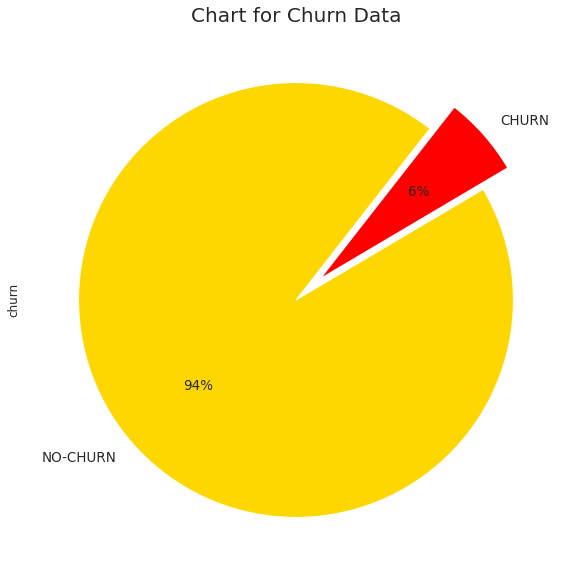

In [403]:
#considering the problem statement let us calculate churn 
#churn means the person is not using either call service or internet service
dataframe['churn'] = np.where(dataframe['total_usage']== 0, 1, 0)  # 0 = 'no churn', 1 = 'churn'
#graphical depiction on churn
ax = figsize=(19, 8)
colors = ["Gold", "Red"]
labels ="NO-CHURN", "CHURN"
plt.title('Chart for Churn Data', fontsize=20)
dataframe["churn"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.0f%%', colors=colors, labels=labels, fontsize=13.5, startangle=52)
plt.show()


In [404]:
#as we need to predict the customer churn scenario drop the last month which
dataframe = dataframe.drop(dataframe.filter(regex='_8', axis = 1).columns, axis=1)
#shape check
dataframe.shape

(20951, 91)

In [405]:
#as our primary focus is on churn let us calculate customer churn percentage
y = dataframe['churn']
churn = (sum(y)/len(y.index))*100
#printing the percentage of Churn
print(churn)
#shape of the data frame 
dataframe.shape

5.947210157033077


(20951, 91)

## **3. Data Visualization**

In [406]:
correlation = dataframe.corr()
dataframe.corr()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech,total_usage,churn
id,1.000000,0.000217,0.003332,0.004373,0.007450,-0.014320,-0.011885,0.002689,-0.008447,-0.006198,...,-0.001279,-0.001982,-0.001779,0.007710,0.003902,0.002161,-0.006063,0.002053,0.003839,-0.001022
arpu_6,0.000217,1.000000,0.659914,0.286198,0.141746,0.448085,0.254787,0.111629,0.060851,0.183826,...,0.046458,0.031049,-0.005228,0.119934,0.120331,0.164935,0.058891,0.880079,0.184698,0.078602
arpu_7,0.003332,0.659914,1.000000,0.138902,0.262996,0.270432,0.428791,0.074391,0.075537,0.113935,...,0.024925,0.060668,-0.013569,0.141775,0.160727,0.107490,-0.030494,0.905317,0.318502,-0.078939
onnet_mou_6,0.004373,0.286198,0.138902,1.000000,0.717399,0.005842,-0.052689,0.010545,0.013779,0.062567,...,-0.034133,-0.020435,-0.089943,-0.083222,-0.089394,-0.079571,0.081880,0.227479,0.218346,0.090418
onnet_mou_7,0.007450,0.141746,0.262996,0.717399,1.000000,-0.037077,-0.001920,0.024246,-0.004200,0.064856,...,-0.037141,-0.029263,-0.093466,-0.079620,-0.083426,-0.083776,0.016417,0.224846,0.346859,-0.029524
offnet_mou_6,-0.014320,0.448085,0.270432,0.005842,-0.037077,1.000000,0.694327,0.024998,0.019171,0.091520,...,-0.041710,-0.044597,-0.043698,-0.062032,-0.073106,-0.061596,0.056397,0.388196,0.234048,0.062327
offnet_mou_7,-0.011885,0.254787,0.428791,-0.052689,-0.001920,0.694327,1.000000,0.041299,0.011749,0.088876,...,-0.044818,-0.041255,-0.060568,-0.067088,-0.078549,-0.078810,-0.015322,0.381568,0.366180,-0.072303
roam_ic_mou_6,0.002689,0.111629,0.074391,0.010545,0.024246,0.024998,0.041299,1.000000,0.488998,0.636523,...,-0.010327,-0.009467,0.016209,0.018900,0.009465,0.020024,0.043420,0.098488,0.035346,0.057478
roam_ic_mou_7,-0.008447,0.060851,0.075537,0.013779,-0.004200,0.019171,0.011749,0.488998,1.000000,0.297984,...,-0.003608,-0.003840,-0.007155,0.020990,0.018220,0.033190,0.060703,0.075215,-0.020335,0.092850
roam_og_mou_6,-0.006198,0.183826,0.113935,0.062567,0.064856,0.091520,0.088876,0.636523,0.297984,1.000000,...,-0.018758,-0.015305,-0.006778,-0.000894,-0.013044,-0.004019,0.061153,0.167726,0.033967,0.077185


In [407]:
#drop features based on correlation
highCorrel = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
drophighCorrel = [column for column in highCorrel.columns if any(highCorrel[column] > 0.7)] #selecting correlation > 70
dataframe = dataframe.drop(drophighCorrel, axis=1)
#shape check
dataframe.shape

(20951, 57)

In [408]:
dataframe.drop("id",axis = 1, inplace = True)
dataframe.head()

,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,...,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jun_vbc_3g,churn_probability,total_usage,churn
12,439.919,397.946,244.46,571.98,727.91,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,322,0.0,0.0,0,714.40,0
15,580.549,377.294,10.43,317.11,341.79,0.0,0.0,0.0,0.0,10.43,...,0,0,0,0,602,0.0,0.0,0,1730.17,0
23,1130.948,905.506,859.53,293.46,450.11,0.0,0.0,0.0,0.0,859.53,...,0,0,0,0,455,0.0,0.0,0,591.10,0
24,371.974,352.069,93.18,531.19,507.76,0.0,0.0,0.0,0.0,93.18,...,0,0,0,0,1219,0.0,0.0,0,444.83,0
25,362.951,321.763,193.71,423.21,184.88,0.0,0.0,0.0,0.0,49.81,...,0,0,0,0,2831,0.0,0.0,0,1209.07,0


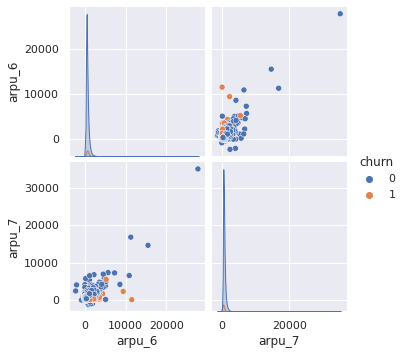

In [409]:
#plot for Average revenue per user for the last two month 6,7 with Churn
sns.pairplot(data=dataframe[['arpu_6','arpu_7','churn']],hue='churn')
plt.show()

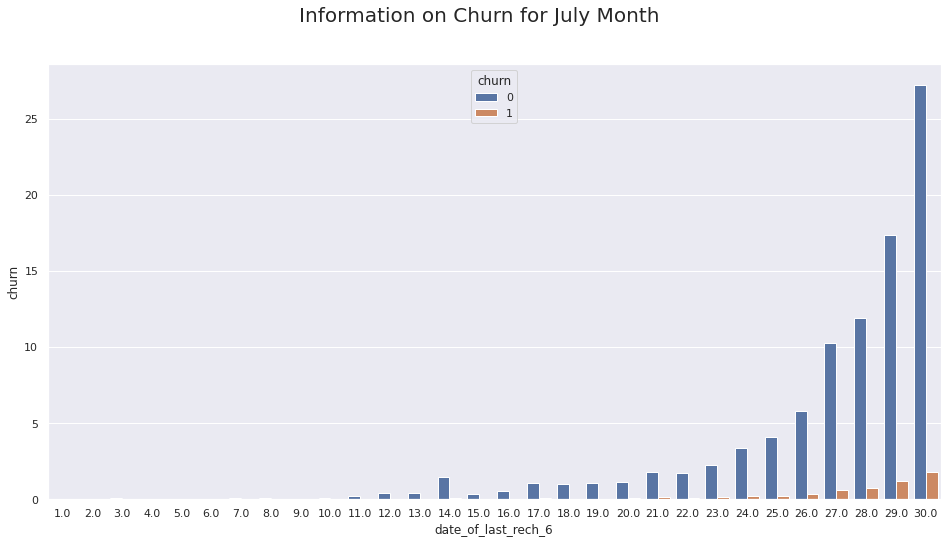

In [410]:
#plot between the average revenue per user with the churn for the month of June.
plt.figure(figsize=(16,8))
labels ="No Churn", "Churn"
plt.suptitle('Information on Churn for July Month', fontsize=20)
#bar plot of date of last recharge in July
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=dataframe, estimator=lambda x: len(x) / len(dataframe) * 100)
plt.show()

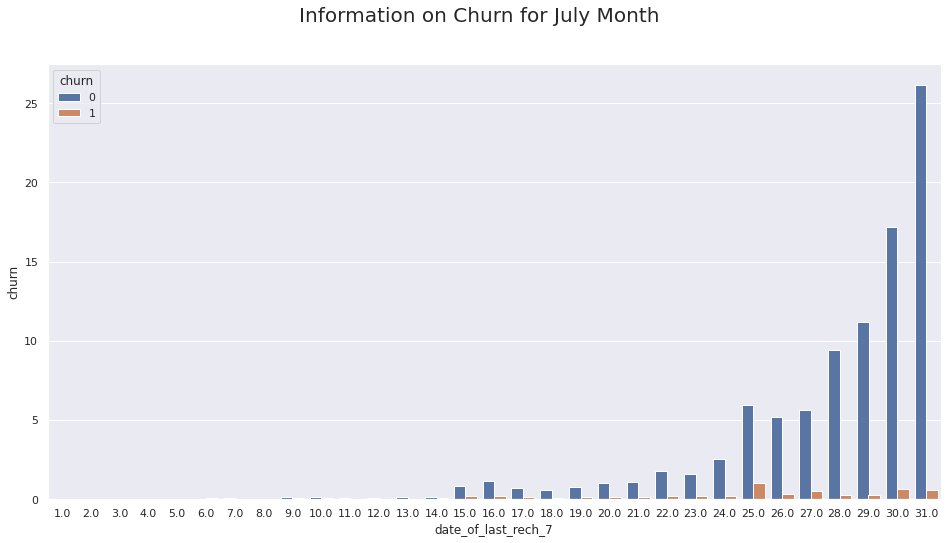

In [411]:
#plot between the average revenue per user with the churn for the month of July.
plt.figure(figsize=(16,8))
labels ="No Churn", "Churn"
plt.suptitle('Information on Churn for July Month', fontsize=20)
#bar plot of date of last recharge in July
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=dataframe, estimator=lambda x: len(x) / len(dataframe) * 100)
plt.show()

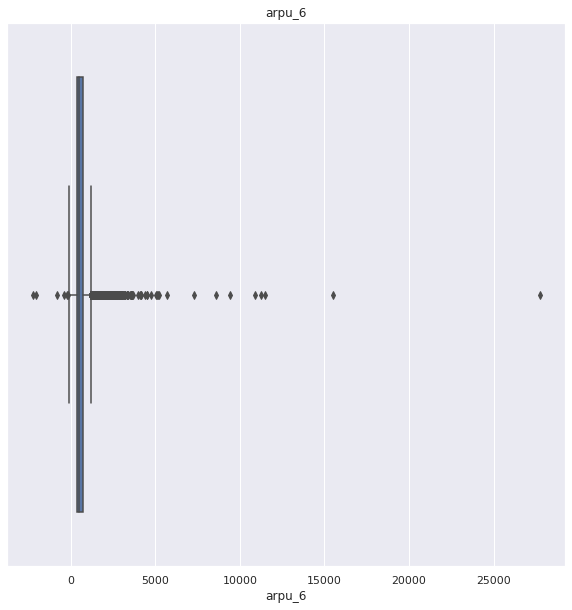

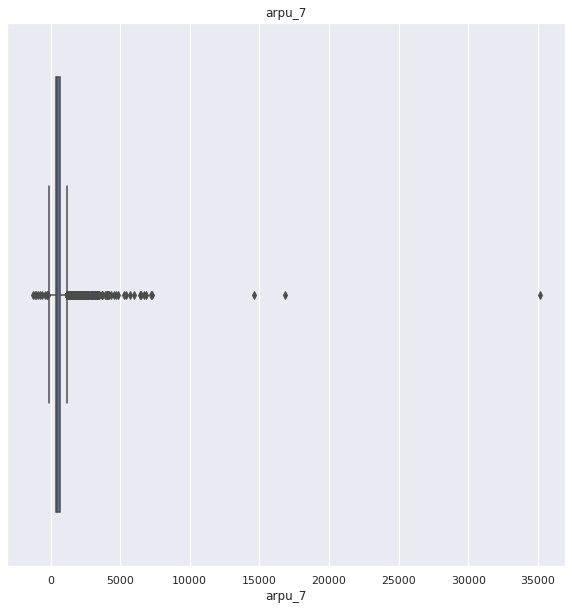

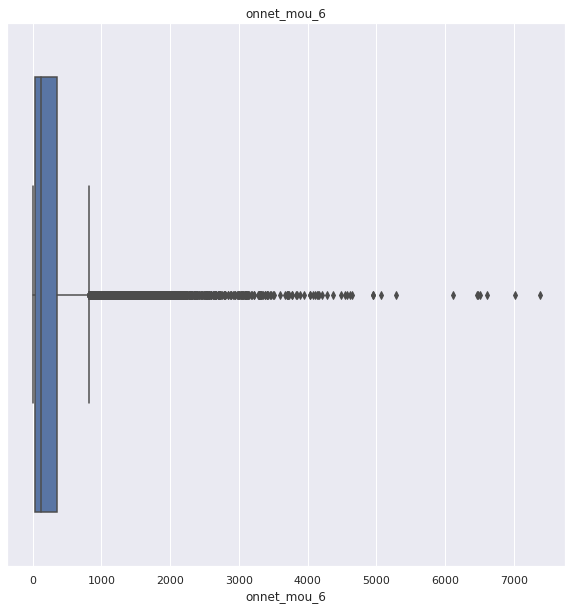

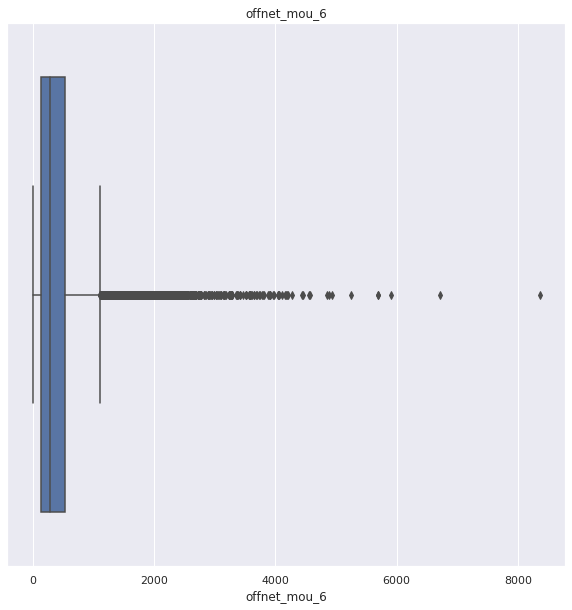

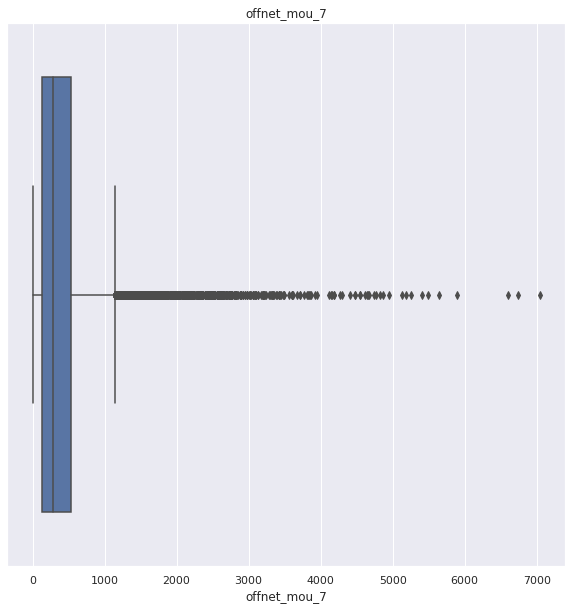

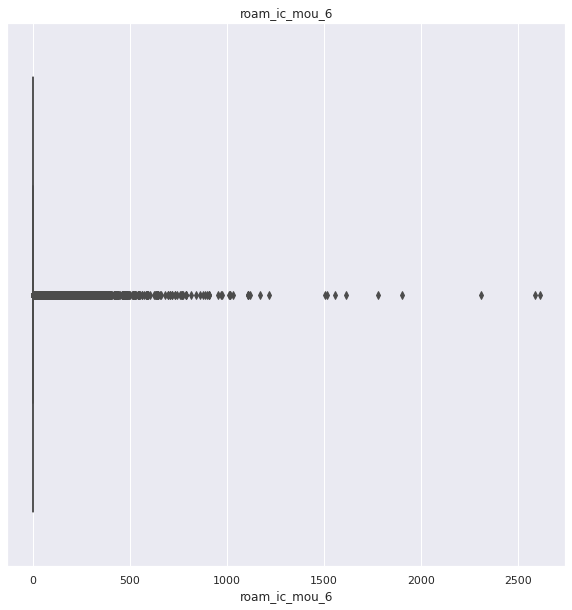

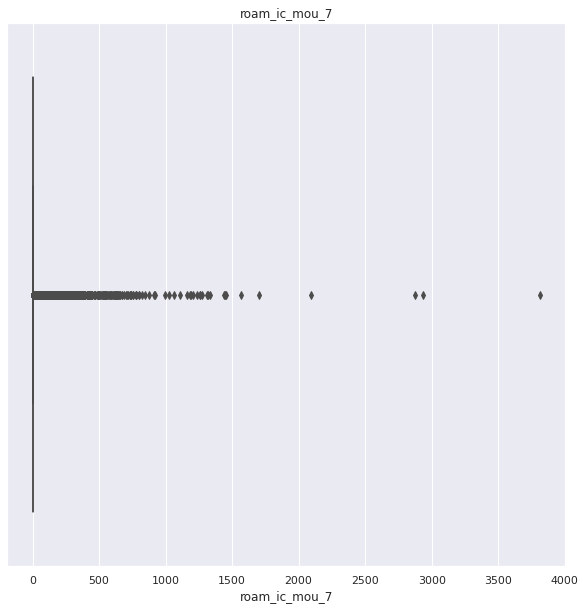

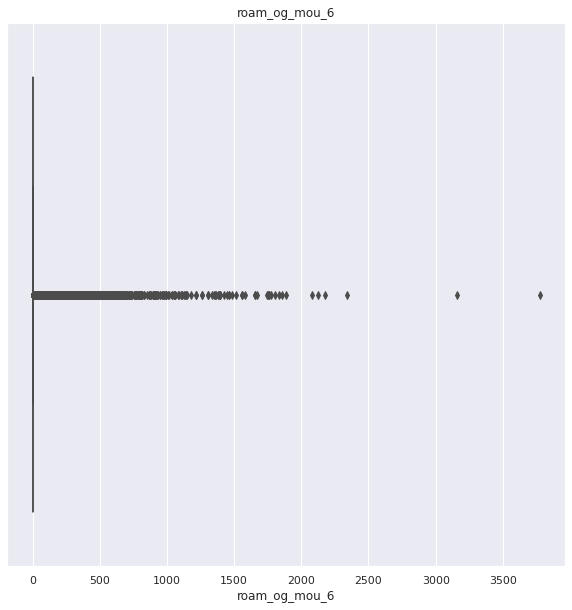

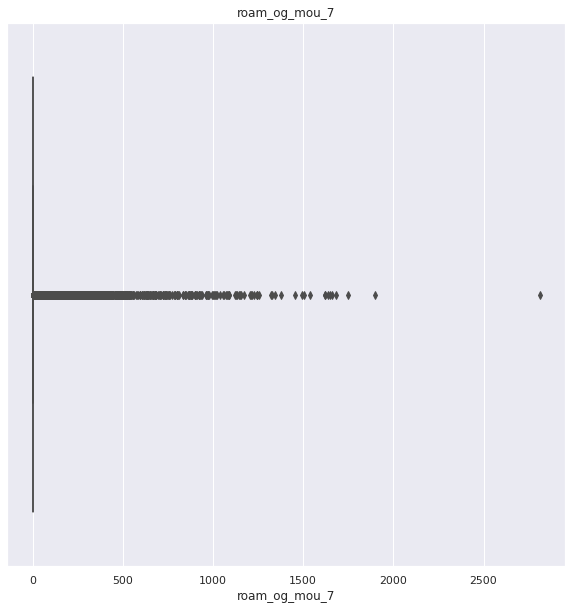

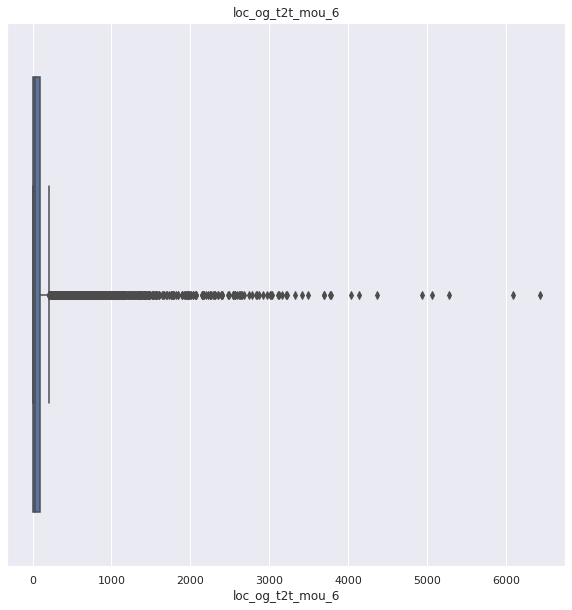

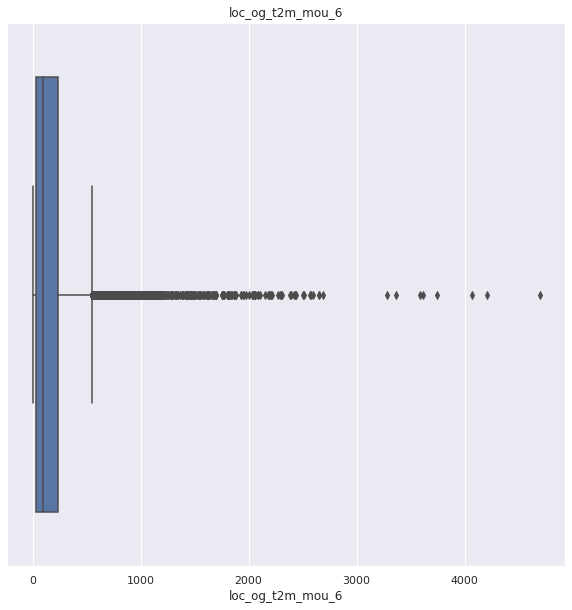

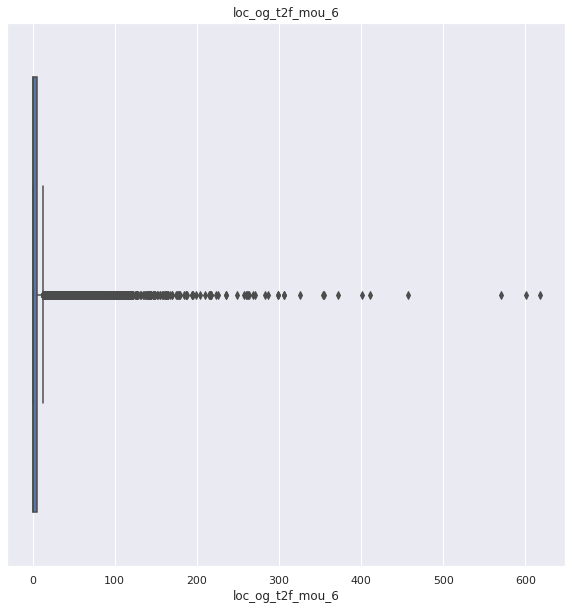

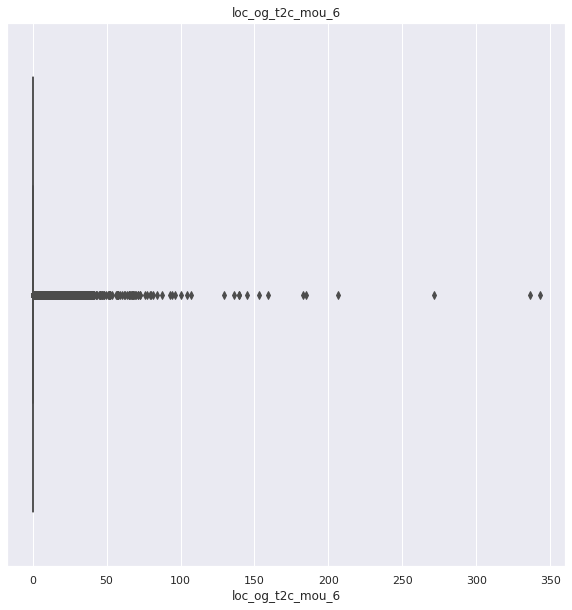

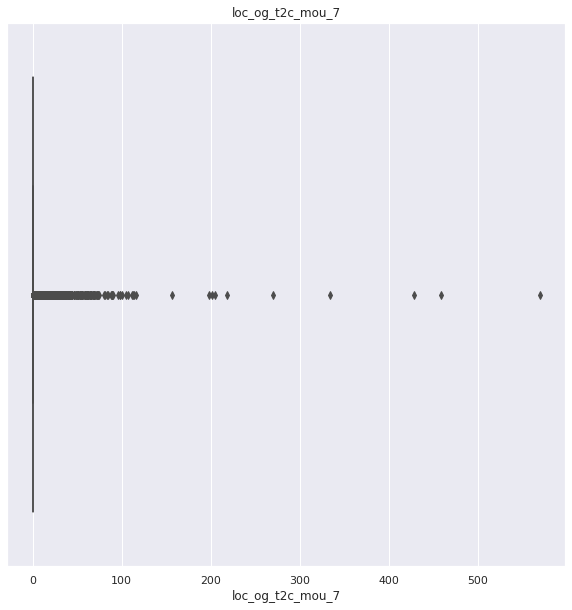

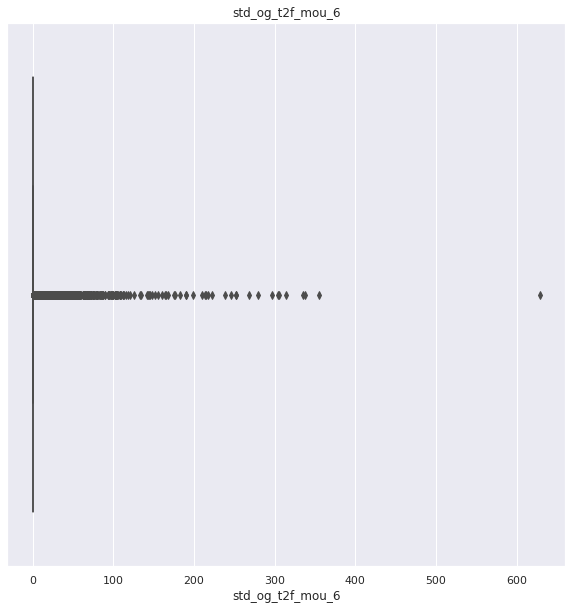

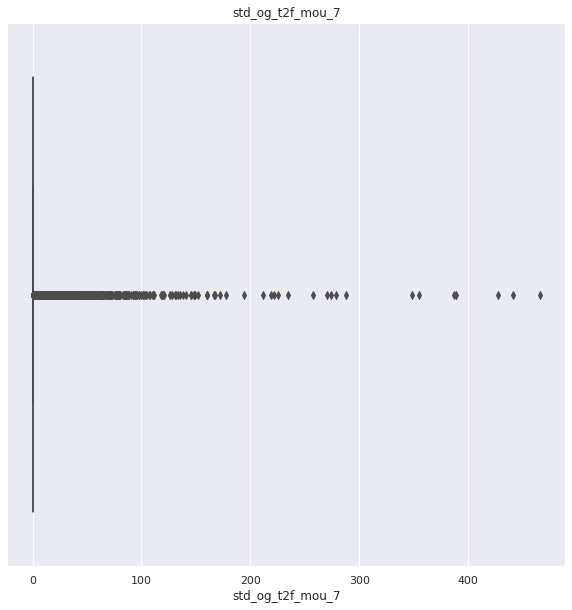

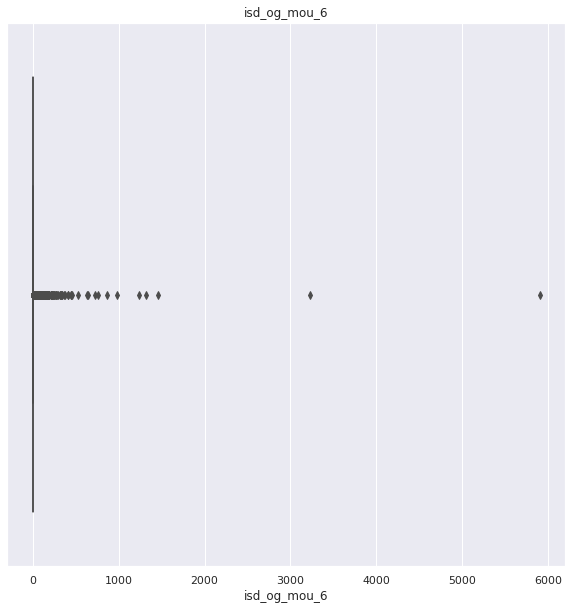

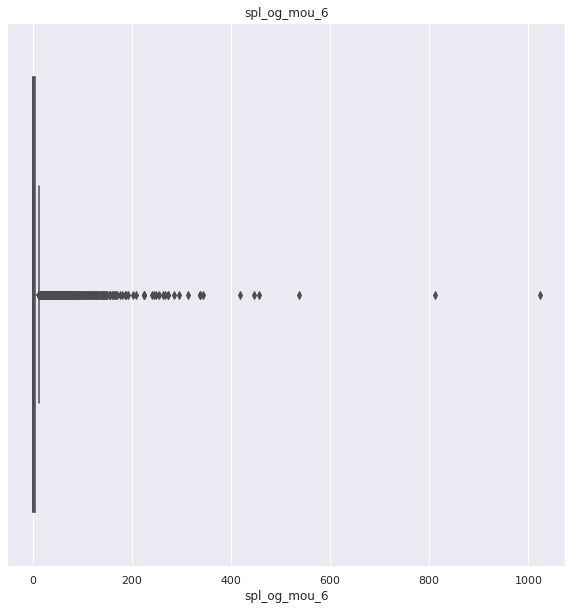

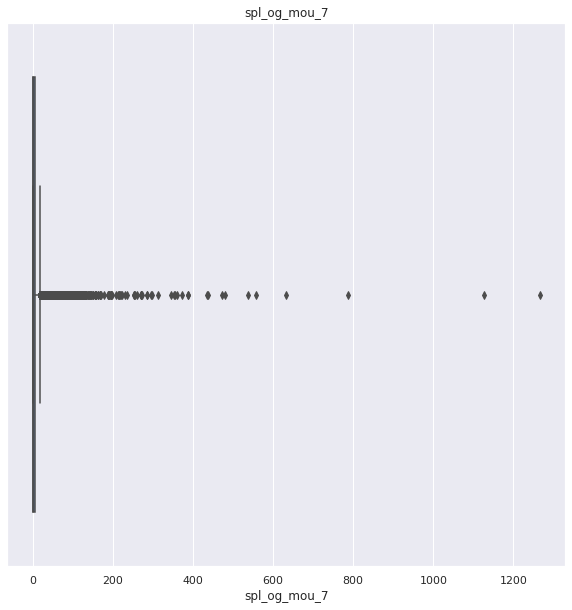

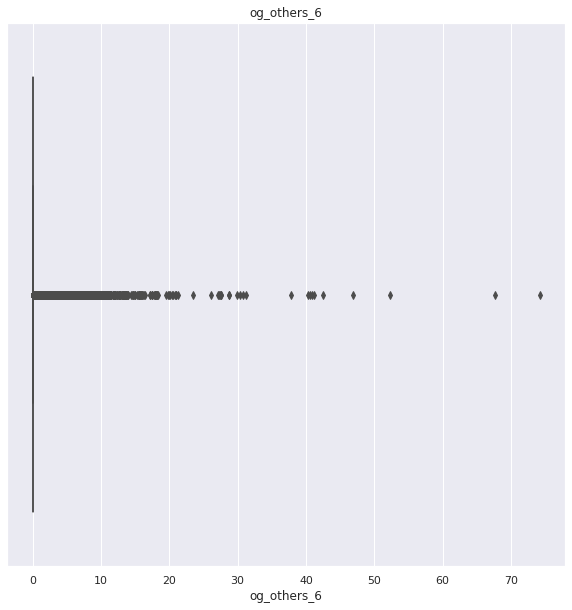

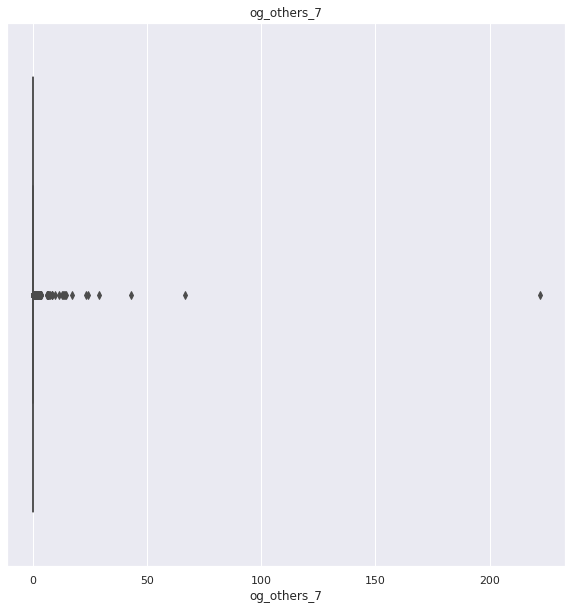

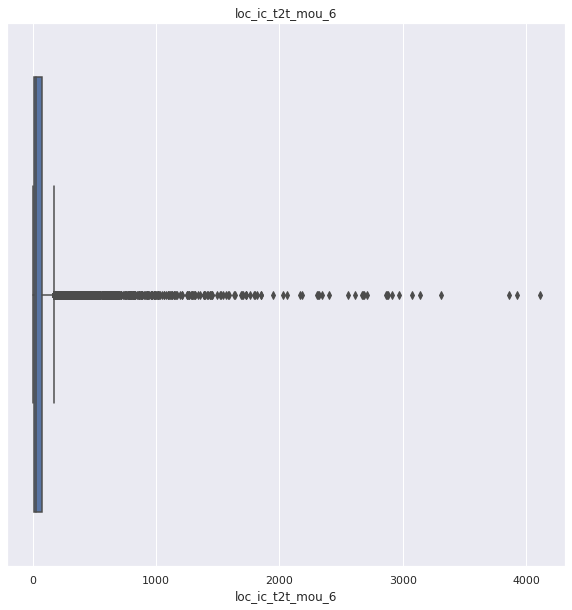

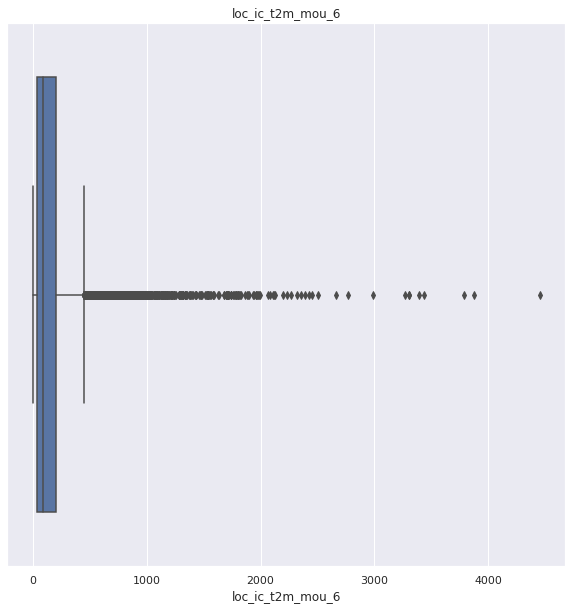

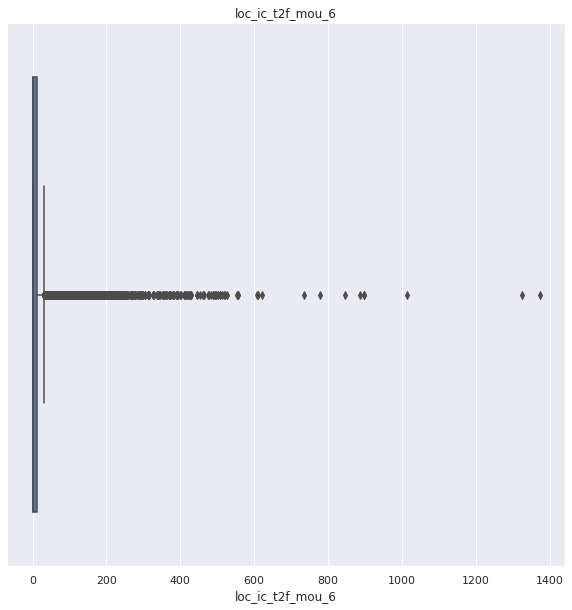

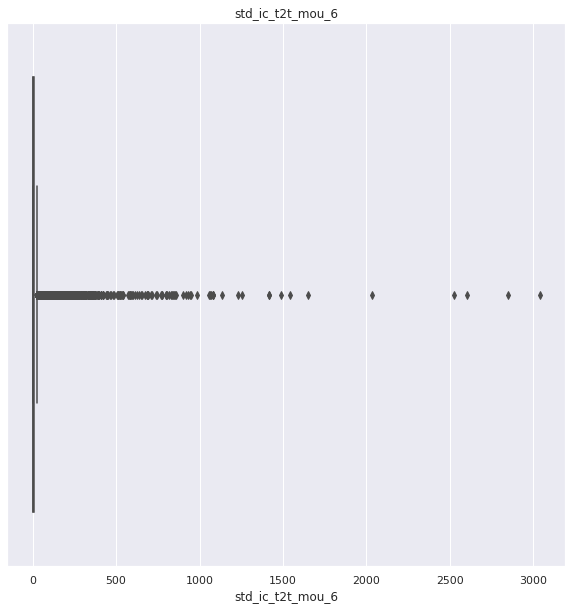

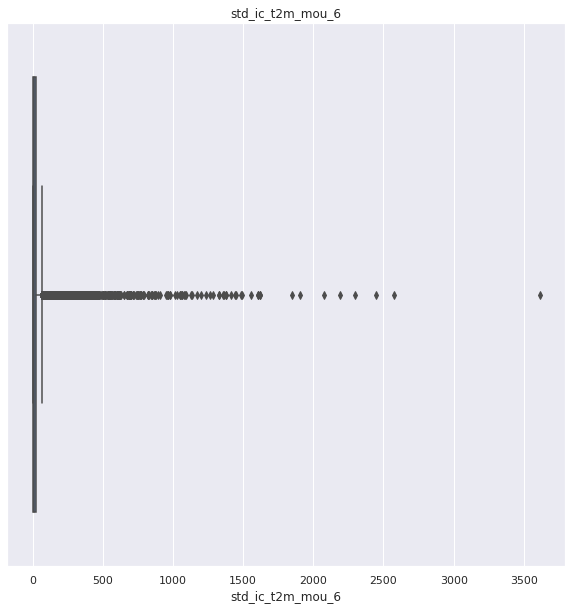

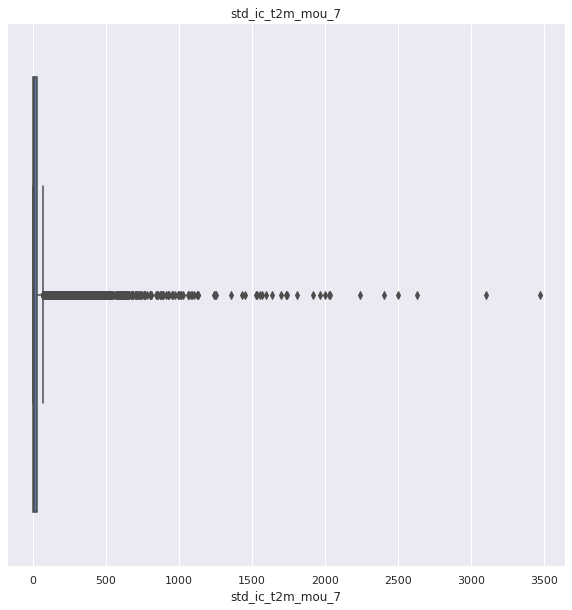

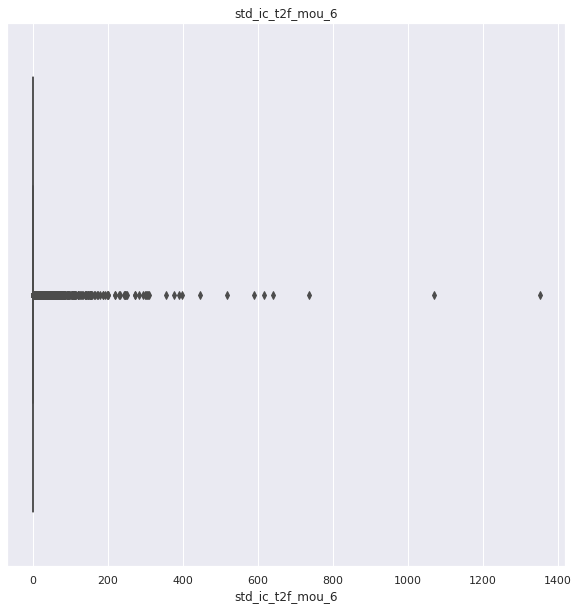

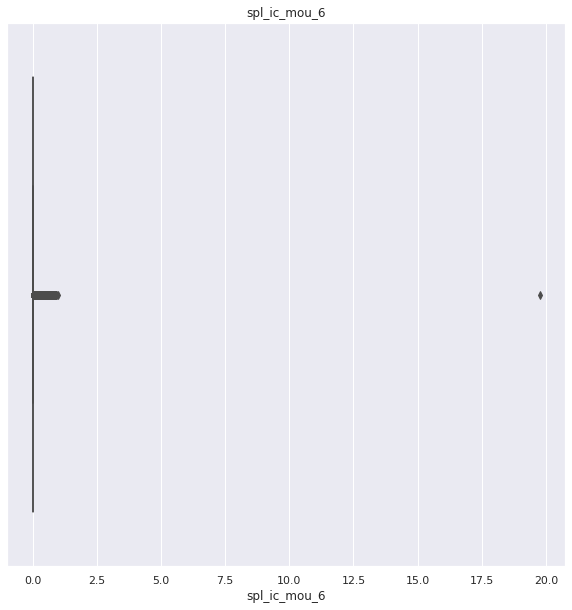

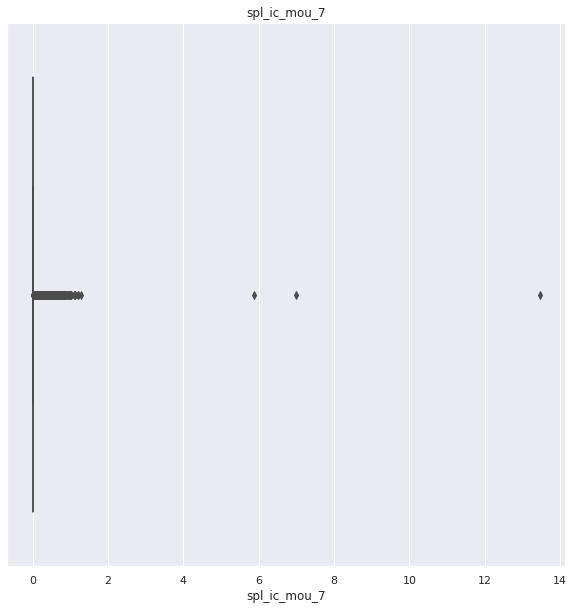

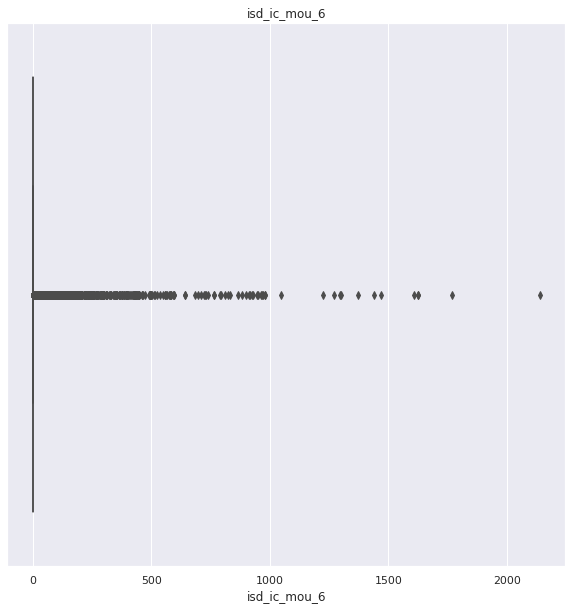

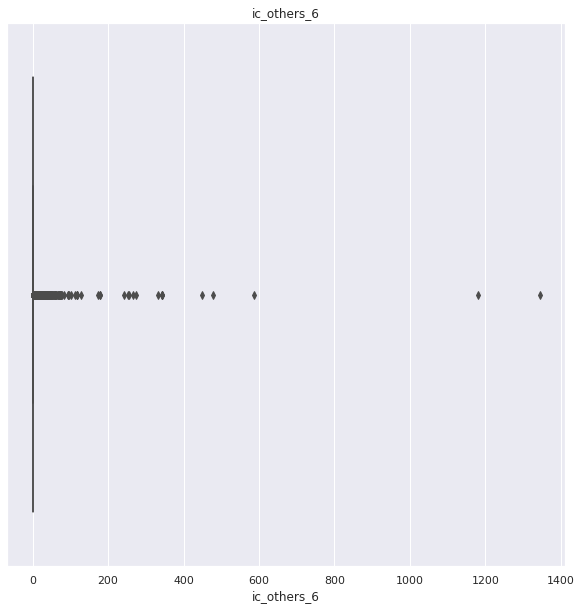

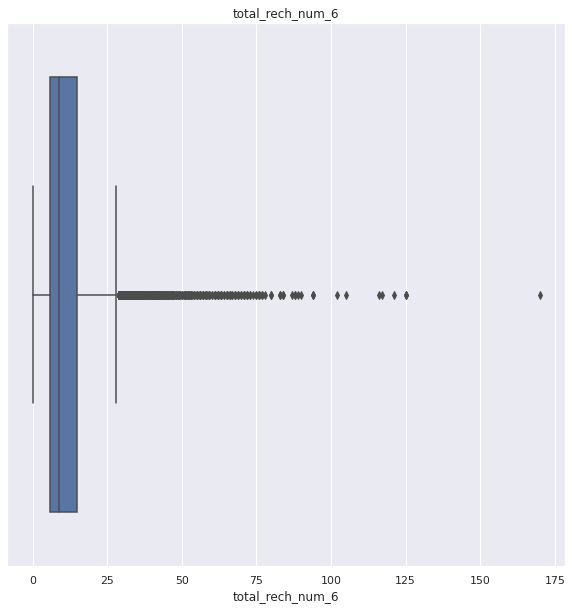

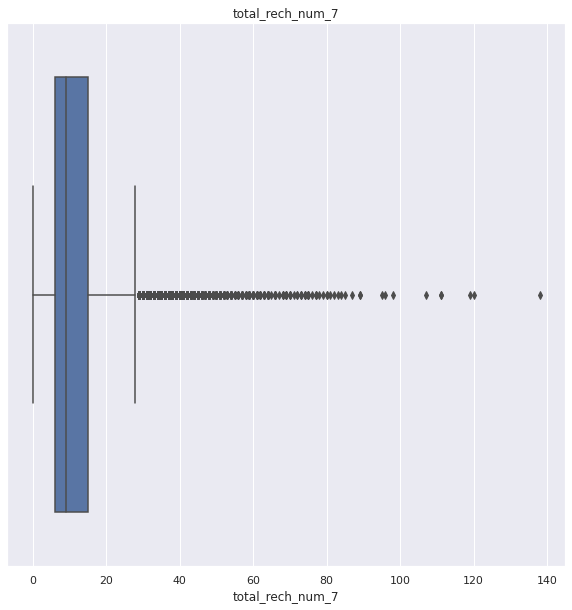

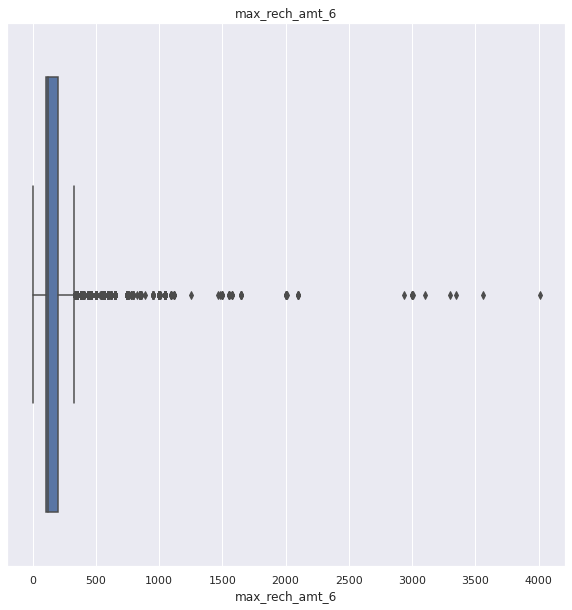

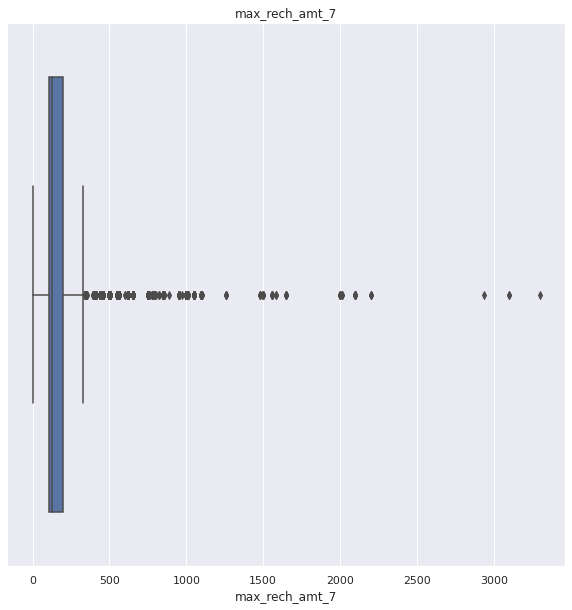

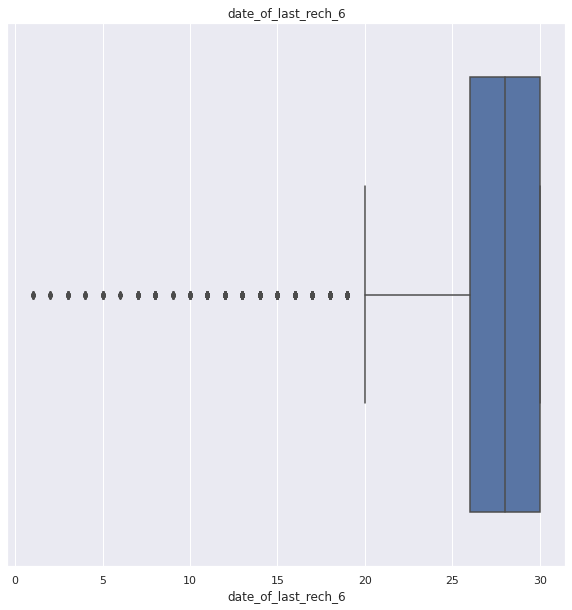

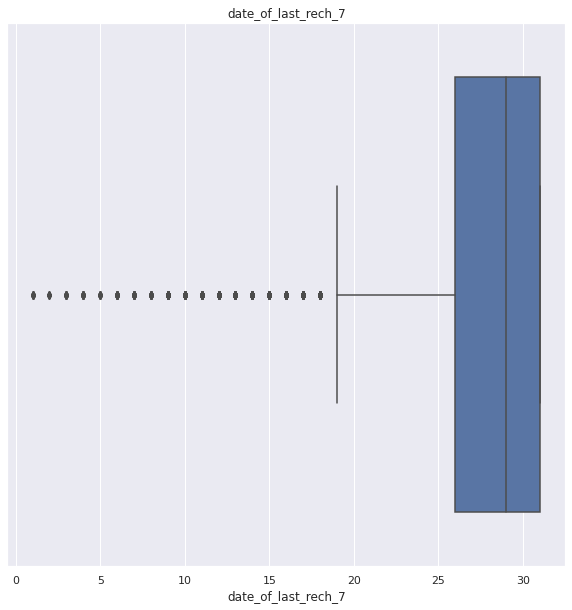

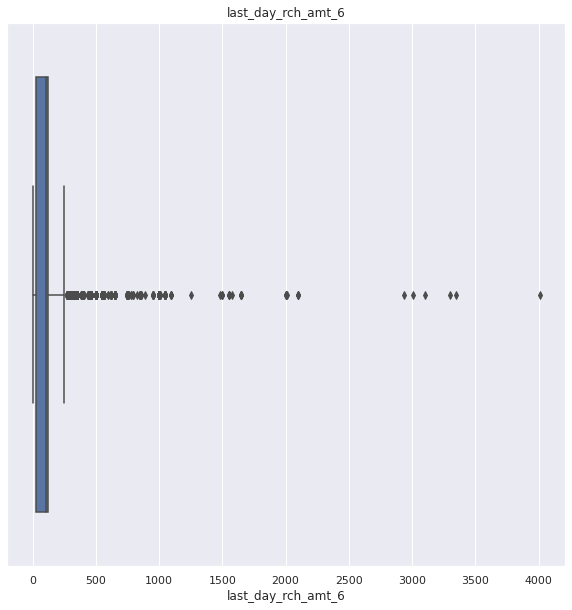

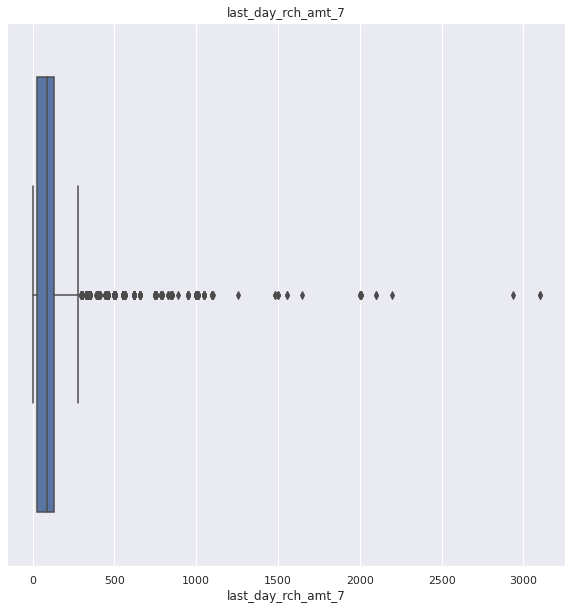

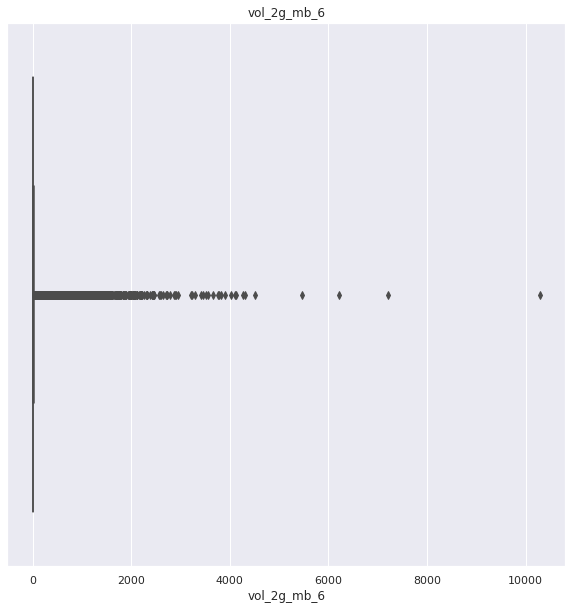

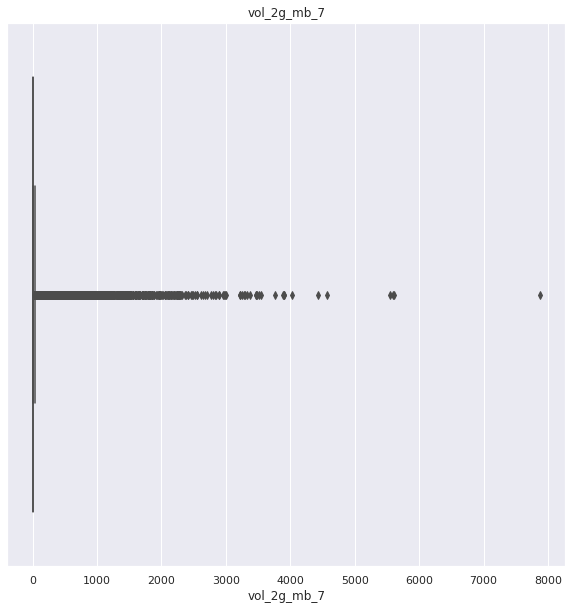

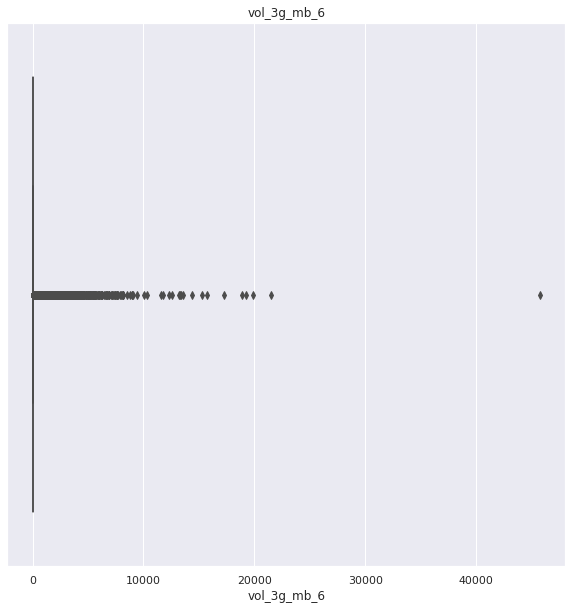

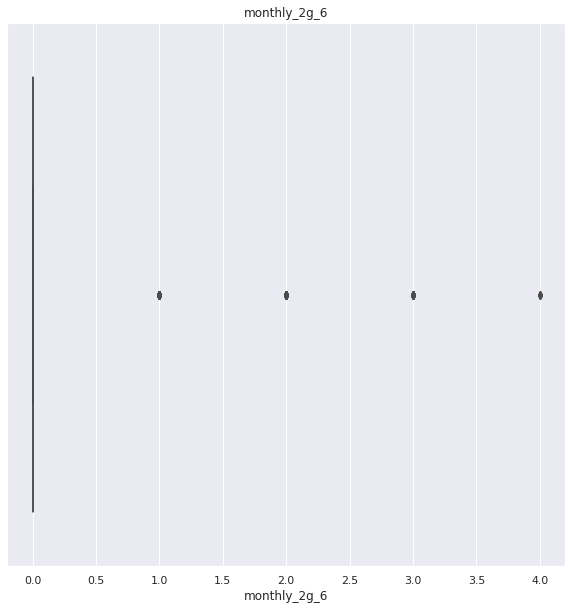

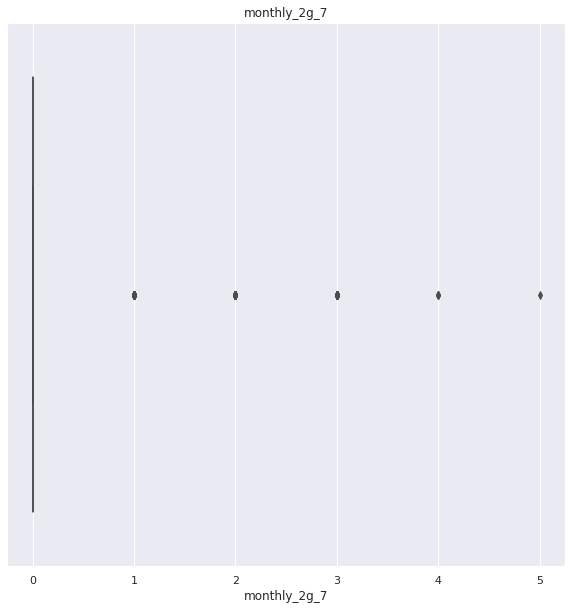

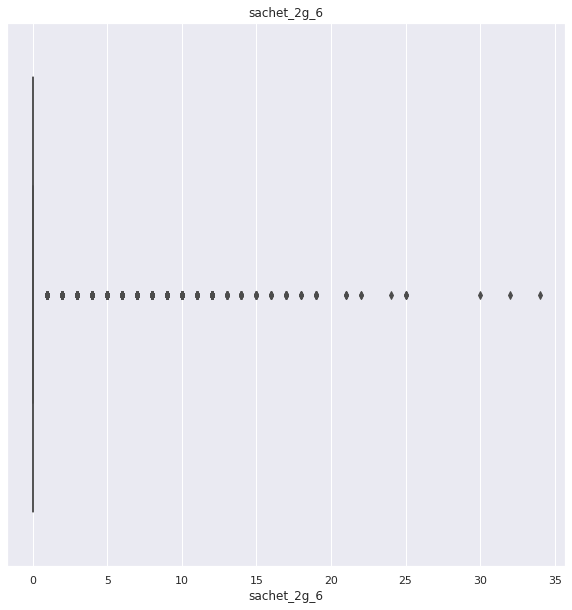

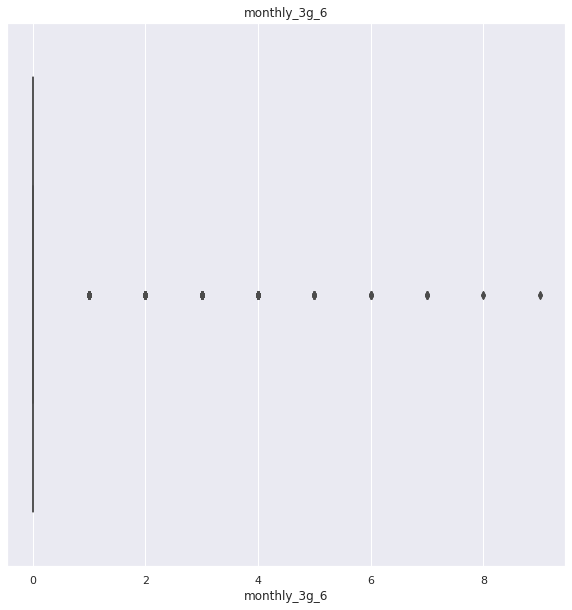

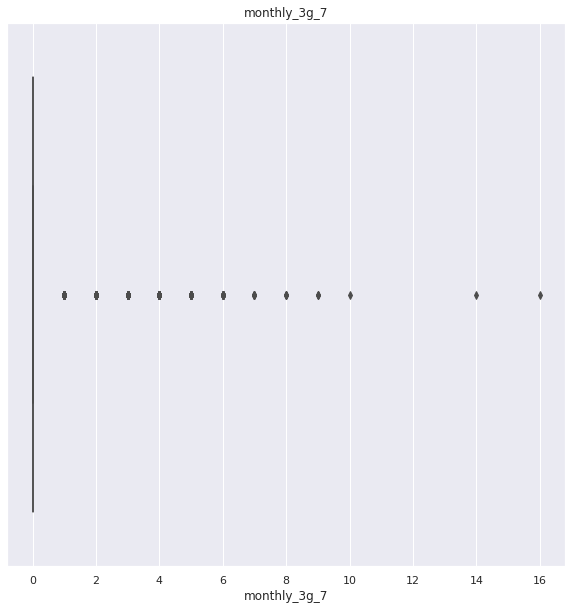

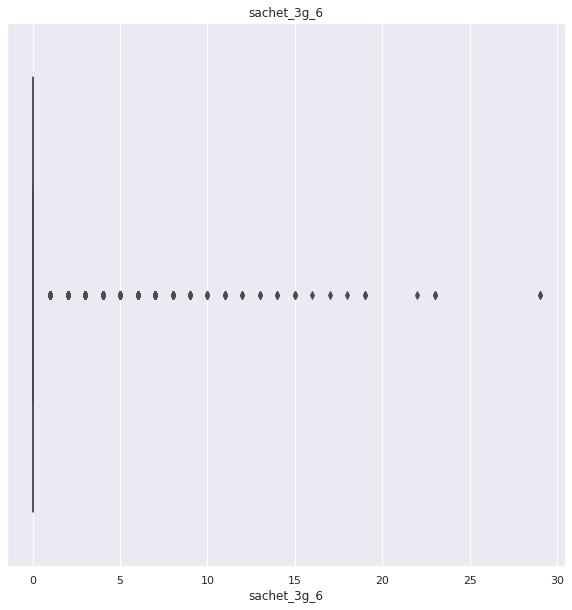

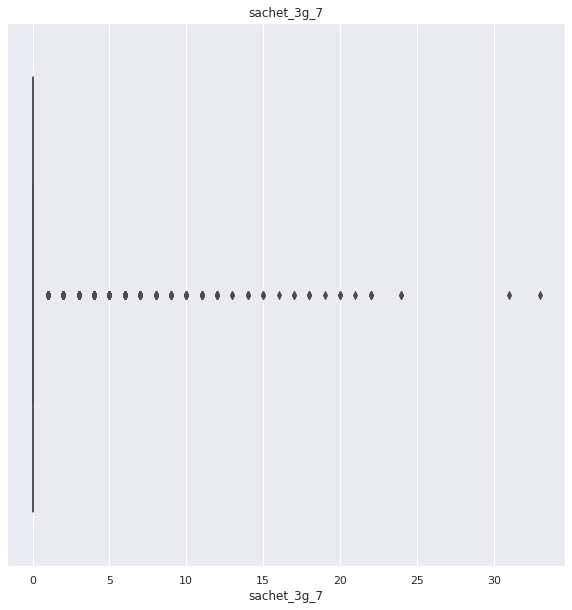

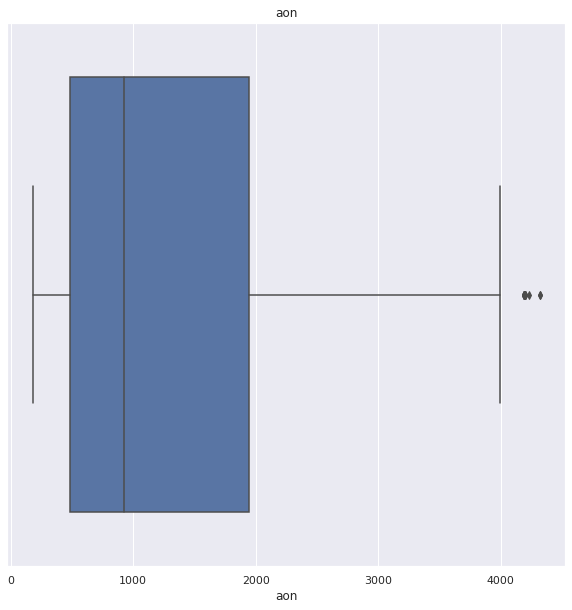

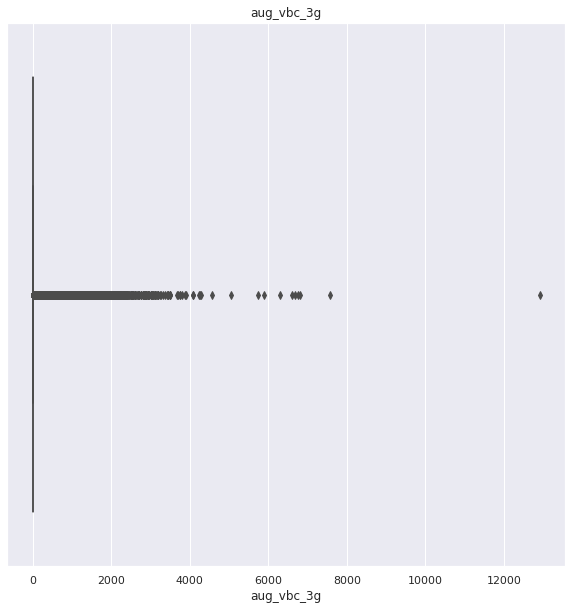

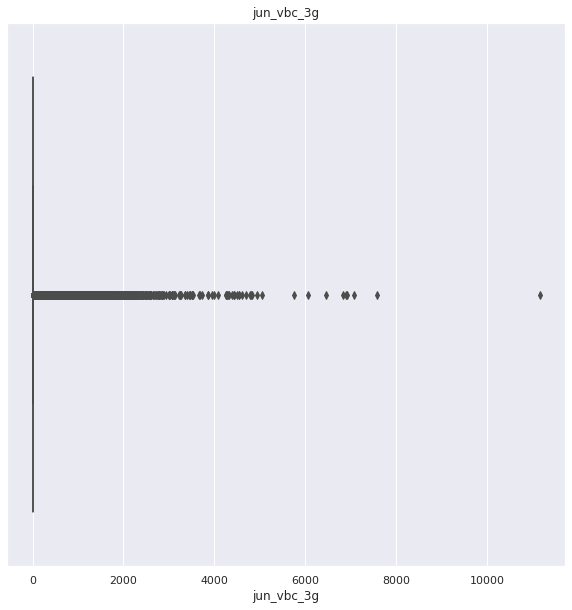

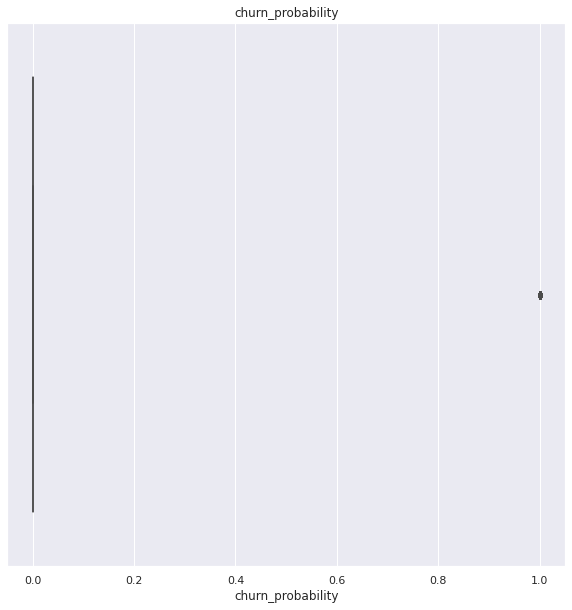

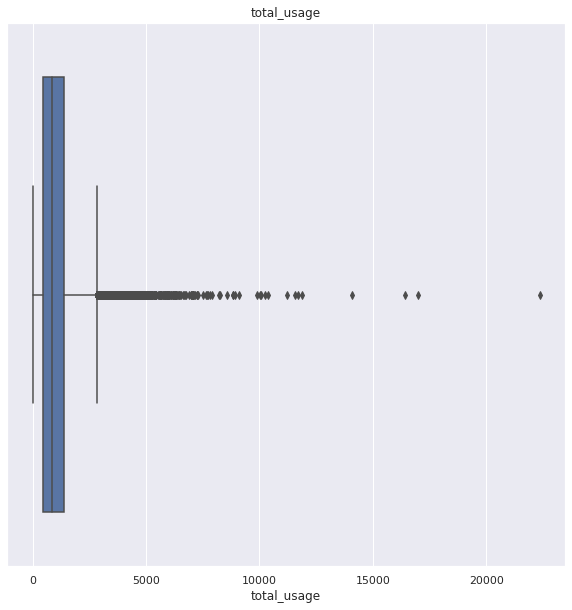

In [412]:
#outlier check
num_var = [col for col in dataframe.columns if col not in ['churn']]
for i in num_var:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(dataframe[i],palette="deep")
    plt.title(i)
    plt.show()


## **4. Model Building**

In [413]:
#import necessary libraries for model buiding which includes PCA, Decision Trees etc..,
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV,train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [414]:
#split the data
X = dataframe.drop(['churn'],axis=1)
Y = dataframe['churn']

In [415]:
#standardisation
cols = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=cols)
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, train_size=0.7,test_size=0.3,random_state=100)
#shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14665, 55)
(14665,)
(6286, 55)
(6286,)


In [416]:
#PCA on train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
#extract pca model from pipeline
pca = pca.named_steps['pca']
#variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     8.12  
1     14.71 
2     20.28 
3     25.05 
4     29.38 
5     33.12 
6     36.62 
7     39.93 
8     43.09 
9     46.11 
10    49.04 
11    51.89 
12    54.40 
13    56.64 
14    58.74 
15    60.67 
16    62.51 
17    64.32 
18    66.09 
19    67.83 
20    69.54 
21    71.15 
22    72.75 
23    74.30 
24    75.82 
25    77.29 
26    78.74 
27    80.14 
28    81.49 
29    82.79 
30    84.03 
31    85.23 
32    86.40 
33    87.52 
34    88.56 
35    89.56 
36    90.49 
37    91.40 
38    92.26 
39    92.99 
40    93.68 
41    94.28 
42    94.88 
43    95.43 
44    95.98 
45    96.50 
46    97.01 
47    97.49 
48    97.97 
49    98.41 
50    98.81 
51    99.19 
52    99.55 
53    99.82 
54    100.00
dtype: float64


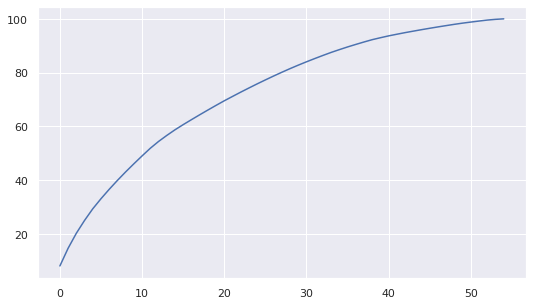

In [417]:
#plot of feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

In [418]:
# create pipeline
PCA_VARS = 55
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)
# fit model
pipeline.fit(X_train, Y_train)

# check score on train data
pipeline.score(X_train, Y_train)

0.967746334810774

In [419]:
#prediction of churn on test data
Y_pred = pipeline.predict(X_test)
#creating the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#generating scores
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, Y_pred, average='binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), )
#AUC check
Y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC : ", round(roc_auc_score(Y_test, Y_pred_prob),2))

[[5704  201]
 [   2  379]]
Sensitivity :  0.99 
 Specificity :  0.97
AUC :  0.99


In [420]:
#Hyperparameter tuning - PCA and Logistic Regression
# class imbalance
Y_train.value_counts()/Y_train.shape

0    0.941016
1    0.058984
Name: churn, dtype: float64

In [421]:
# PCA
pca = PCA()
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)]
# compile pipeline
pca_logistic = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [10, 20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [422]:
#fit model
model.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [10, 20]},
             scoring='roc_auc', verbose=1)

In [423]:
#cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067913,0.013724,0.000000,0.000000,0.1,l1,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,0.089432,0.007999,0.000000,0.000000,0.1,l1,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 20}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,0.087485,0.003727,0.006318,0.000189,0.1,l2,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 10}",0.896297,0.872244,0.892111,0.884297,0.885072,0.886004,0.008202,16
3,0.121134,0.007669,0.006599,0.000770,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 20}",0.960656,0.964801,0.959699,0.963693,0.959653,0.961700,0.002139,1
4,0.057292,0.002306,0.000000,0.000000,0.5,l1,10,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
5,0.083909,0.004453,0.000000,0.000000,0.5,l1,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 20}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
6,0.083462,0.004910,0.006259,0.000669,0.5,l2,10,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 10}",0.900852,0.877268,0.899435,0.884278,0.889139,0.890194,0.008969,14
7,0.115202,0.001929,0.006205,0.000704,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 20}",0.950792,0.962836,0.959010,0.963332,0.959670,0.959128,0.004500,7
8,0.059457,0.003919,0.000000,0.000000,1,l1,10,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
9,0.078573,0.008642,0.000000,0.000000,1,l1,20,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 20}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


In [424]:
#best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9617001759235988
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 20}


In [425]:
#prediction of churn on test data
Y_pred = model.predict(X_test)
#creating the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#generating scores
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, Y_pred, average='binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), )
#AUC check
Y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC : ", round(roc_auc_score(Y_test, Y_pred_prob),2))

[[5575  330]
 [ 105  276]]
Sensitivity :  0.72 
 Specificity :  0.94
AUC :  0.95


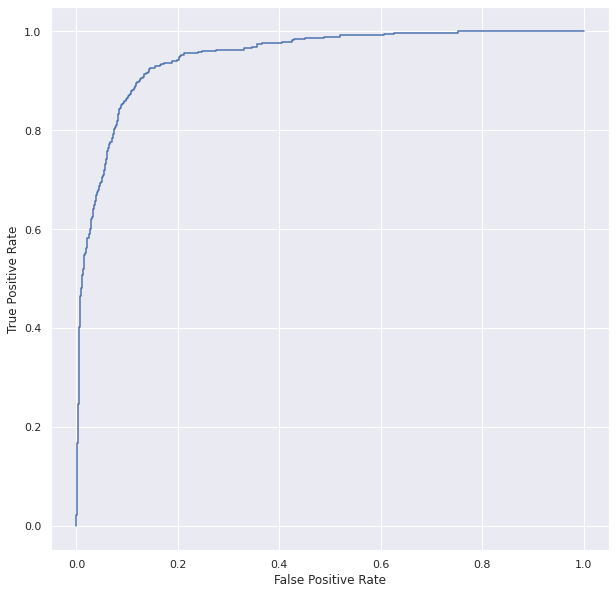

In [426]:
from sklearn.metrics import roc_curve, auc
#plotting ROC curve using user defined function
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_prob)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [427]:
#random forest
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
#hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
#create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
#fit model
model.fit(X_train, Y_train)
#best hyperparameters
print("Best AUC : ", model.best_score_)
print("Best hyperparameters : ", model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best AUC :  1.0
Best hyperparameters :  {'criterion': 'gini', 'max_features': 'auto'}


In [428]:
#prediction of churn on test data
Y_pred = model.predict(X_test)
#creating the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#generating scores
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, Y_pred, average='binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), )
#AUC check
Y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC : ", round(roc_auc_score(Y_test, Y_pred_prob),2))

[[5901    4]
 [   0  381]]
Sensitivity :  1.0 
 Specificity :  1.0
AUC :  1.0


In [429]:
#choose the best features
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)
rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)
#fit model
rf_model.fit(X_train, Y_train)
#OOB score
rf_model.oob_score_

7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


0.9995908625980225

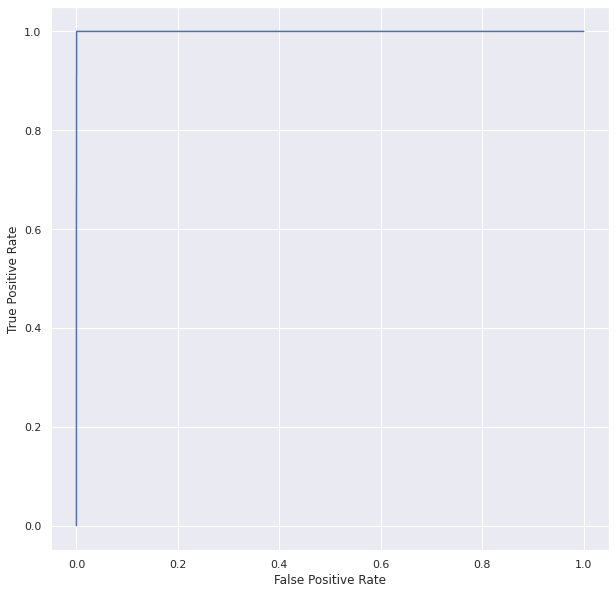

In [430]:
from sklearn.metrics import roc_curve, auc
#plotting ROC curve using user defined function
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_prob)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [431]:
#feature importance
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,54,42.995706
1,53,20.017572
2,8,5.171800
3,6,3.911201
4,37,3.116488
5,39,2.841232
6,1,2.543547
7,51,1.936959
8,4,1.702442
9,35,1.309344


In [432]:
#logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]
#pipeline
logistic = Pipeline(steps)
#hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
#create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [433]:
#fit model
model.fit(X_train, Y_train)
#best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best AUC:  0.996117114852978
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [434]:
#prediction of churn on test data
Y_pred = model.predict(X_test)
#creating the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#generating scores
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, Y_pred, average='binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), )
#AUC check
Y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC : ", round(roc_auc_score(Y_test, Y_pred_prob),2))

[[5754  151]
 [   2  379]]
Sensitivity :  0.99 
 Specificity :  0.97
AUC :  1.0


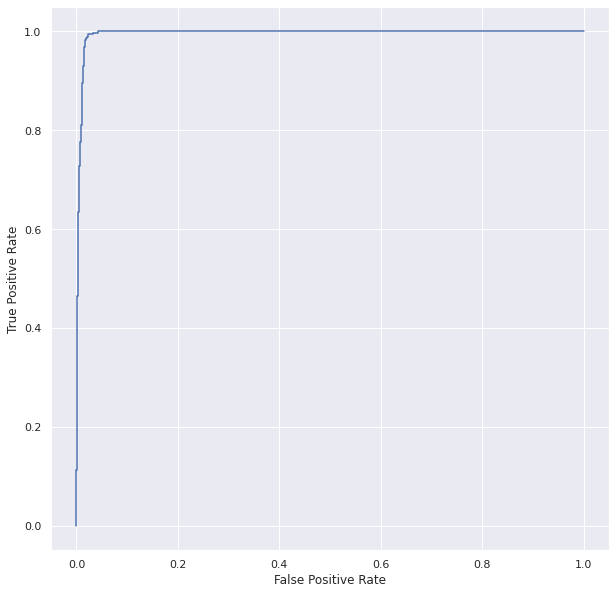

In [435]:
from sklearn.metrics import roc_curve, auc
#plotting ROC curve using user defined function
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_prob)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [436]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
#construct pipeline
pipe = Pipeline([('pca', PCA(n_components=40)), ('clf', DecisionTreeClassifier(class_weight = 'balanced', max_depth = 6, min_samples_leaf = 40, min_samples_split = 25, criterion = 'gini', max_features = 40))])
#fit the pipeline
pipe.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        max_features=40, min_samples_leaf=40,
                                        min_samples_split=25))])

In [437]:
import pickle
with open("trained_model.pickle", "wb") as file:
  pickle.dump(model, file)

In [438]:
# Make Predictions
y_pred_dt = pipe.predict(X_test)
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5905
           1       0.43      0.98      0.60       381

    accuracy                           0.92      6286
   macro avg       0.71      0.95      0.78      6286
weighted avg       0.96      0.92      0.93      6286



In [439]:
# create onfusion matrix
CM_PCADt = confusion_matrix(Y_test, y_pred_dt)
#True positive 
TP = CM_PCADt[1,1] 
#True negatives
TN = CM_PCADt[0,0] 
#False positives
FP = CM_PCADt[0,1] 
#False negatives
FN = CM_PCADt[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, y_pred_dt.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)
# check area under curve
Y_pcaDt_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(Y_test, Y_pcaDt_pred_prob),2))
# check precision Score
print('Average Precision Score: ', round(average_precision_score(Y_test, Y_pcaDt_pred_prob),2))

Accuracy : 0.9198218262806236
Sensitivity:  0.979002624671916
Specificity:  0.9160033869602032
AUC: 	 0.99
Average Precision Score:  0.9


In [440]:
#Build DecisionTree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
Y_dtPca_pred = dt.predict(X_test)
#confusion matrix
CM_PCADt_2 = confusion_matrix(Y_test, Y_dtPca_pred)
#True positive 
TP = CM_PCADt_2[1,1] 
#True negatives
TN = CM_PCADt_2[0,0] 
#False positives
FP = CM_PCADt_2[0,1] 
#False negatives
FN = CM_PCADt_2[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, Y_dtPca_pred.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)
#AUC
Y_dtPca_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(Y_test, Y_dtPca_pred_prob),2))
#precision Score
print('Average Precision Score: ', round(average_precision_score(Y_test, Y_dtPca_pred_prob),2))

Accuracy : 0.9996818326439707
Sensitivity:  1.0
Specificity:  0.9996613039796782
AUC: 	 0.99
Average Precision Score:  0.9


In [441]:
# Generate the final prediction dataframe
Y_actual = dataframe['churn']
dataframe_final = pd.DataFrame()
dataframe_final['Actual Churn'] = Y_actual
dataframe_final.head()


,Actual Churn
12,0
15,0
23,0
24,0
25,0


In [442]:
#final predictions
Y_prediction_final = pipe.predict(X_scaled)
#classification report
print(classification_report(Y_actual, Y_prediction_final))
#confusion matrix
conf_final = confusion_matrix(Y_actual, Y_prediction_final)
#True positive 
TP = conf_final[1,1] 
#True negatives
TN = conf_final[0,0] 
#False positives
FP = conf_final[0,1] 
#False negatives
FN = conf_final[1,0]
total = sum(sum(conf_final))
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
accuracy = ((TP+TN)/ total)
print("Accuracy : ", accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     19705
           1       0.43      0.99      0.60      1246

    accuracy                           0.92     20951
   macro avg       0.71      0.95      0.78     20951
weighted avg       0.97      0.92      0.93     20951

Accuracy :  0.9200992792706792
Sensitivity:  0.9919743178170144
Specificity:  0.9155544278102005


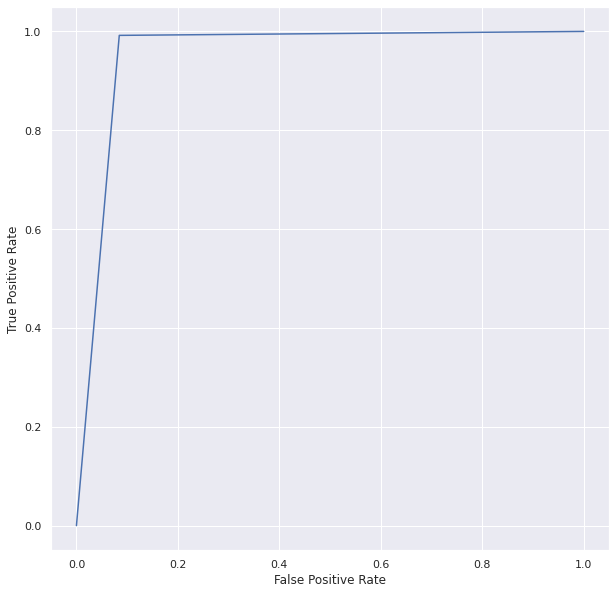

In [443]:
from sklearn.metrics import roc_curve, auc
#plotting ROC curve using user defined function
fpr, tpr, _ = metrics.roc_curve(Y_actual, Y_prediction_final)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [444]:
auc = roc_auc_score(Y_actual, Y_prediction_final)
print('Area Under The Curve: ', "{:.2%}".format(auc))
aps = average_precision_score(Y_test, Y_dtPca_pred_prob)
print('Average Precision Score: ', "{:.2%}".format(aps))

Area Under The Curve:  95.38%
Average Precision Score:  90.03%


In [445]:
#final prediction data frame
dataframe_final['Predicted Churn'] = Y_prediction_final
dataframe_final = dataframe_final.reset_index(drop = True)
dataframe_final

,Actual Churn,Predicted Churn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
20946,0,0
20947,0,0
20948,0,0
20949,0,0


In [446]:
# 0 = No-churn and 1 = churn
dataframe_final['Actual Churn'] = dataframe_final['Actual Churn'].map({1: 'Churn', 0: 'No-Churn'})
dataframe_final['Predicted Churn'] = dataframe_final['Predicted Churn'].map({1: 'Churn', 0: 'No-Churn'})
dataframe_final.head()

,Actual Churn,Predicted Churn
0,No-Churn,No-Churn
1,No-Churn,No-Churn
2,No-Churn,No-Churn
3,No-Churn,No-Churn
4,No-Churn,No-Churn


## **5.Conclusion**

1. Most of the people churn in the month ends so add any exciting offers to retain valuable customers.
2. Recharge date is also crucial as people not recharging for month will automatically get into risk of churn,
3. Roaming amounts should be re altered if necessary as it is good source of income and maintaining the most valuable customers will help in long run.
4. STD and ISD rates are too high which might increase the churn rate so offers on that will reduce the risk.